In [22]:
import pandas as pd
from surprise import SVD
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split

In [23]:
reader = Reader(line_format='user item rating', sep=',', skip_lines=1)
data = Dataset.load_from_file('my_user_ratings_full_3m.csv', reader=reader).build_full_trainset() 

In [24]:
algo = SVD()
#train, test = train_test_split(data, test_size=.2)

In [25]:
algo.fit(data)

In [26]:
#prediction = algo.test(test) 

In [27]:
algo.predict('9147556', '40312', verbose=True)[3]

user: 9147556    item: 40312      r_ui = None   est = 3.80   {'was_impossible': False}


3.8044770027820918

uid = str(196)  # raw user id (as in the ratings file). They are **strings**!
iid = str(302)  # raw item id (as in the ratings file). They are **strings**!

# get a prediction for specific users and items.
pred = algo.predict(uid, iid, r_ui=4, verbose=True)

In [28]:
popular_anime = pd.read_csv('All anime.csv')
#popular_anime = popular_anime[popular_anime['ratingCount'] > 200000]
very_popular_anime = pd.read_csv('All anime with 40000 ratings.csv')
very_popular_anime

,id,title,ratingCount
0,1,Cowboy Bebop,481187
1,5,Cowboy Bebop: Tengoku no Tobira,135971
2,6,Trigun,238947
3,15,Eyeshield 21,57723
4,16,Hachimitsu to Clover,61386
5,18,Initial D Fourth Stage,51863
6,19,Monster,155992
7,20,Naruto,865621
8,21,One Piece,559725
9,22,Tennis no Ouji-sama,54499


In [29]:
kien = pd.DataFrame(columns = ['movieId', 'title', 'ratings'])
kien['movieId'] = very_popular_anime['id'].copy()
kien['title'] = very_popular_anime['title'].copy()
for i in kien.index:
    movie_id = kien.loc[i, 'movieId']
    rating = algo.predict('9147556', str(movie_id) , verbose=True)[3] * 2
    kien.loc[i, 'ratings'] = rating

user: 9147556    item: 1          r_ui = None   est = 3.64   {'was_impossible': False}
user: 9147556    item: 5          r_ui = None   est = 3.55   {'was_impossible': False}
user: 9147556    item: 6          r_ui = None   est = 3.65   {'was_impossible': False}
user: 9147556    item: 15         r_ui = None   est = 4.16   {'was_impossible': False}
user: 9147556    item: 16         r_ui = None   est = 3.88   {'was_impossible': False}
user: 9147556    item: 18         r_ui = None   est = 4.00   {'was_impossible': False}
user: 9147556    item: 19         r_ui = None   est = 4.09   {'was_impossible': False}
user: 9147556    item: 20         r_ui = None   est = 3.61   {'was_impossible': False}
user: 9147556    item: 21         r_ui = None   est = 3.58   {'was_impossible': False}
user: 9147556    item: 22         r_ui = None   est = 4.06   {'was_impossible': False}
user: 9147556    item: 24         r_ui = None   est = 3.66   {'was_impossible': False}
user: 9147556    item: 27         r_ui = No

user: 9147556    item: 897        r_ui = None   est = 3.07   {'was_impossible': False}
user: 9147556    item: 898        r_ui = None   est = 3.11   {'was_impossible': False}
user: 9147556    item: 899        r_ui = None   est = 3.16   {'was_impossible': False}
user: 9147556    item: 900        r_ui = None   est = 3.14   {'was_impossible': False}
user: 9147556    item: 901        r_ui = None   est = 3.25   {'was_impossible': False}
user: 9147556    item: 902        r_ui = None   est = 3.21   {'was_impossible': False}
user: 9147556    item: 903        r_ui = None   est = 3.17   {'was_impossible': False}
user: 9147556    item: 904        r_ui = None   est = 2.86   {'was_impossible': False}
user: 9147556    item: 905        r_ui = None   est = 3.47   {'was_impossible': False}
user: 9147556    item: 906        r_ui = None   est = 3.48   {'was_impossible': False}
user: 9147556    item: 918        r_ui = None   est = 3.95   {'was_impossible': False}
user: 9147556    item: 934        r_ui = No

user: 9147556    item: 4224       r_ui = None   est = 3.68   {'was_impossible': False}
user: 9147556    item: 4280       r_ui = None   est = 3.75   {'was_impossible': False}
user: 9147556    item: 4282       r_ui = None   est = 3.94   {'was_impossible': False}
user: 9147556    item: 4382       r_ui = None   est = 3.30   {'was_impossible': False}
user: 9147556    item: 4437       r_ui = None   est = 3.79   {'was_impossible': False}
user: 9147556    item: 4472       r_ui = None   est = 3.65   {'was_impossible': False}
user: 9147556    item: 4477       r_ui = None   est = 3.94   {'was_impossible': False}
user: 9147556    item: 4551       r_ui = None   est = 3.78   {'was_impossible': False}
user: 9147556    item: 4565       r_ui = None   est = 4.05   {'was_impossible': False}
user: 9147556    item: 4654       r_ui = None   est = 3.82   {'was_impossible': False}
user: 9147556    item: 4722       r_ui = None   est = 3.63   {'was_impossible': False}
user: 9147556    item: 4725       r_ui = No

user: 9147556    item: 6956       r_ui = None   est = 4.06   {'was_impossible': False}
user: 9147556    item: 6987       r_ui = None   est = 3.16   {'was_impossible': False}
user: 9147556    item: 7054       r_ui = None   est = 4.03   {'was_impossible': False}
user: 9147556    item: 7059       r_ui = None   est = 3.31   {'was_impossible': False}
user: 9147556    item: 7088       r_ui = None   est = 3.48   {'was_impossible': False}
user: 9147556    item: 7148       r_ui = None   est = 3.69   {'was_impossible': False}
user: 9147556    item: 7193       r_ui = None   est = 3.76   {'was_impossible': False}
user: 9147556    item: 7311       r_ui = None   est = 3.77   {'was_impossible': False}
user: 9147556    item: 7338       r_ui = None   est = 3.91   {'was_impossible': False}
user: 9147556    item: 7465       r_ui = None   est = 3.70   {'was_impossible': False}
user: 9147556    item: 7472       r_ui = None   est = 3.63   {'was_impossible': False}
user: 9147556    item: 7590       r_ui = No

user: 9147556    item: 10790      r_ui = None   est = 3.53   {'was_impossible': False}
user: 9147556    item: 10793      r_ui = None   est = 3.64   {'was_impossible': False}
user: 9147556    item: 10794      r_ui = None   est = 3.29   {'was_impossible': False}
user: 9147556    item: 10798      r_ui = None   est = 3.53   {'was_impossible': False}
user: 9147556    item: 10800      r_ui = None   est = 4.03   {'was_impossible': False}
user: 9147556    item: 10805      r_ui = None   est = 3.29   {'was_impossible': False}
user: 9147556    item: 10863      r_ui = None   est = 3.62   {'was_impossible': False}
user: 9147556    item: 10897      r_ui = None   est = 2.84   {'was_impossible': False}
user: 9147556    item: 11013      r_ui = None   est = 3.48   {'was_impossible': False}
user: 9147556    item: 11061      r_ui = None   est = 4.12   {'was_impossible': False}
user: 9147556    item: 11111      r_ui = None   est = 3.54   {'was_impossible': False}
user: 9147556    item: 11123      r_ui = No

user: 9147556    item: 15751      r_ui = None   est = 3.33   {'was_impossible': False}
user: 9147556    item: 15809      r_ui = None   est = 3.63   {'was_impossible': False}
user: 9147556    item: 16001      r_ui = None   est = 3.74   {'was_impossible': False}
user: 9147556    item: 16005      r_ui = None   est = 3.64   {'was_impossible': False}
user: 9147556    item: 16009      r_ui = None   est = 3.83   {'was_impossible': False}
user: 9147556    item: 16011      r_ui = None   est = 3.83   {'was_impossible': False}
user: 9147556    item: 16035      r_ui = None   est = 3.75   {'was_impossible': False}
user: 9147556    item: 16049      r_ui = None   est = 4.04   {'was_impossible': False}
user: 9147556    item: 16067      r_ui = None   est = 3.89   {'was_impossible': False}
user: 9147556    item: 16157      r_ui = None   est = 3.34   {'was_impossible': False}
user: 9147556    item: 16201      r_ui = None   est = 3.28   {'was_impossible': False}
user: 9147556    item: 16353      r_ui = No

user: 9147556    item: 21881      r_ui = None   est = 3.68   {'was_impossible': False}
user: 9147556    item: 21939      r_ui = None   est = 4.03   {'was_impossible': False}
user: 9147556    item: 21995      r_ui = None   est = 3.58   {'was_impossible': False}
user: 9147556    item: 22043      r_ui = None   est = 3.82   {'was_impossible': False}
user: 9147556    item: 22101      r_ui = None   est = 3.64   {'was_impossible': False}
user: 9147556    item: 22135      r_ui = None   est = 4.12   {'was_impossible': False}
user: 9147556    item: 22145      r_ui = None   est = 3.44   {'was_impossible': False}
user: 9147556    item: 22147      r_ui = None   est = 3.54   {'was_impossible': False}
user: 9147556    item: 22199      r_ui = None   est = 3.89   {'was_impossible': False}
user: 9147556    item: 22265      r_ui = None   est = 3.69   {'was_impossible': False}
user: 9147556    item: 22273      r_ui = None   est = 3.68   {'was_impossible': False}
user: 9147556    item: 22297      r_ui = No

user: 9147556    item: 29095      r_ui = None   est = 4.16   {'was_impossible': False}
user: 9147556    item: 29317      r_ui = None   est = 3.41   {'was_impossible': False}
user: 9147556    item: 29589      r_ui = None   est = 3.55   {'was_impossible': False}
user: 9147556    item: 29758      r_ui = None   est = 3.16   {'was_impossible': False}
user: 9147556    item: 29785      r_ui = None   est = 3.32   {'was_impossible': False}
user: 9147556    item: 29786      r_ui = None   est = 3.56   {'was_impossible': False}
user: 9147556    item: 29803      r_ui = None   est = 4.04   {'was_impossible': False}
user: 9147556    item: 29854      r_ui = None   est = 3.69   {'was_impossible': False}
user: 9147556    item: 30015      r_ui = None   est = 3.48   {'was_impossible': False}
user: 9147556    item: 30016      r_ui = None   est = 3.93   {'was_impossible': False}
user: 9147556    item: 30123      r_ui = None   est = 3.67   {'was_impossible': False}
user: 9147556    item: 30187      r_ui = No

user: 9147556    item: 33051      r_ui = None   est = 3.81   {'was_impossible': False}
user: 9147556    item: 33094      r_ui = None   est = 3.78   {'was_impossible': False}
user: 9147556    item: 33161      r_ui = None   est = 3.41   {'was_impossible': False}
user: 9147556    item: 33206      r_ui = None   est = 3.88   {'was_impossible': False}
user: 9147556    item: 33253      r_ui = None   est = 3.73   {'was_impossible': False}
user: 9147556    item: 33255      r_ui = None   est = 4.03   {'was_impossible': False}
user: 9147556    item: 33286      r_ui = None   est = 3.54   {'was_impossible': False}
user: 9147556    item: 33337      r_ui = None   est = 3.58   {'was_impossible': False}
user: 9147556    item: 33352      r_ui = None   est = 4.09   {'was_impossible': False}
user: 9147556    item: 33433      r_ui = None   est = 3.63   {'was_impossible': False}
user: 9147556    item: 33475      r_ui = None   est = 3.22   {'was_impossible': False}
user: 9147556    item: 33486      r_ui = No

user: 9147556    item: 37435      r_ui = None   est = 3.94   {'was_impossible': False}
user: 9147556    item: 37450      r_ui = None   est = 3.95   {'was_impossible': False}
user: 9147556    item: 37475      r_ui = None   est = 3.63   {'was_impossible': False}
user: 9147556    item: 37497      r_ui = None   est = 3.67   {'was_impossible': False}
user: 9147556    item: 37510      r_ui = None   est = 3.93   {'was_impossible': False}
user: 9147556    item: 37517      r_ui = None   est = 3.45   {'was_impossible': False}
user: 9147556    item: 37520      r_ui = None   est = 3.82   {'was_impossible': False}
user: 9147556    item: 37521      r_ui = None   est = 4.20   {'was_impossible': False}
user: 9147556    item: 37569      r_ui = None   est = 3.62   {'was_impossible': False}
user: 9147556    item: 37614      r_ui = None   est = 3.69   {'was_impossible': False}
user: 9147556    item: 37675      r_ui = None   est = 4.04   {'was_impossible': False}
user: 9147556    item: 37744      r_ui = No

In [30]:
kien.sort_values(by = 'ratings', inplace = True)

In [31]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [32]:
kien.reset_index(drop = True, inplace = True)
#[andy.shape[0] - 100 : andy.shape[0]]

In [33]:
pd.set_option('display.max_rows', 16567)
pd.set_option('display.max_columns', 16567)
kien
#set(andy['movieId'])

,movieId,title,ratings
0,19315,Pupa,4.50539
1,1639,Boku no Pico,5.23907
2,13807,Corpse Party: Missing Footage,5.52976
3,38573,Tsuujou Kougeki ga Zentai Kougeki de Ni-kai Ko...,5.6758
4,10897,Boku wa Tomodachi ga Sukunai Episode 0,5.68018
5,904,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,5.72472
6,15437,"Kore wa Zombie Desu ka? of the Dead: Hai, Mino...",5.763
7,895,Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsu...,5.79398
8,15085,Amnesia,5.80782
9,12967,Arcana Famiglia,5.83166


In [37]:
rating_7 = kien[kien['ratings'] >= 7].reset_index(drop = True)
import random 
r = random.randrange(0, len(rating_7.index), 1)
rating_7.iloc[r]

movieId                    121
title      Fullmetal Alchemist
ratings                7.02641
Name: 17, dtype: object

In [38]:
#popular_anime
kien.to_csv('My anime recommendation 2.csv', index = False)

In [39]:
import seaborn as sns
sns.set()

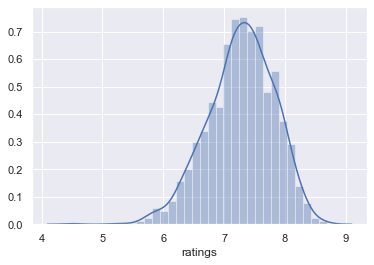

In [40]:
sns.distplot(kien['ratings'])

In [15]:
from surprise import KNNBaseline

In [16]:
knn = KNNBaseline()

In [ ]:
knn.fit(train)

Estimating biases using als...


In [ ]:
knn.predict('9147556', '32901')